# Run Base Code
**Set up env variables and run query plus python code**

In [2]:
exec(open('/home/jovyan/personal/Ray/setup_env.py').read())
exec(open('/home/jovyan/personal/Ray/rays-space/Access Logs/memory_leaks.py').read())
memLeak2

snowflake password:


 ·········


client:


 axa


env:


 qa-uat


Start Date:


 9/1/2021


End Date:


 9/3/2021


query       group  \
3696  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  axa-qa-uat   
3697  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  axa-qa-uat   
3698  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  axa-qa-uat   
3699  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  axa-qa-uat   
3700  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  axa-qa-uat   
...                                             ...         ...   
3859  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  axa-qa-uat   
3860  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  axa-qa-uat   
3861  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  axa-qa-uat   
3862  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  axa-qa-uat   
3863  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  axa-qa-uat   

                    time     value client     env               time_backup  
3696 2021-09-04 02:00:00  0.294884    axa  qa-uat 2021-09-03 22:00:00+00:00  
3697 2021-09-04 03:00:00  0.290803    axa  qa-uat 2021-09-03 23:00:00+00:00  
3698 2021-09-04 04:00:00  0.286069    axa  qa-uat 2021-09-04 00:00:00+00:00  
3699 2021-09-04 05:00:00  0.281654    axa  qa-uat 2021-09-04 01:00:00+00:00  
3700 2021-09-04 06:00:00  0.276815    axa  qa-uat 2021-09-04 02:00:00+00:00  
...                  ...       ...    ...     ...                       ...  
3859 2021-09-10 21:00:00  0.253709    axa  qa-uat 2021-09-10 17:00:00+00:00  
3860 2021-09-10 22:00:00  0.246963    axa  qa-uat 2021-09-10 18:00:00+00:00  
3861 2021-09-10 23:00:00  0.240628    axa  qa-uat 2021-09-10 19:00:00+00:00  
3862 2021-09-11 00:00:00  0.233845    axa  qa-uat 2021-09-10 20:00:00+00:00  
3863 2021-09-11 01:00:00  0.229388    axa  qa-uat 2021-09-10 21:00:00+00:00  

[168 rows x 7 columns]

# Charts

[]

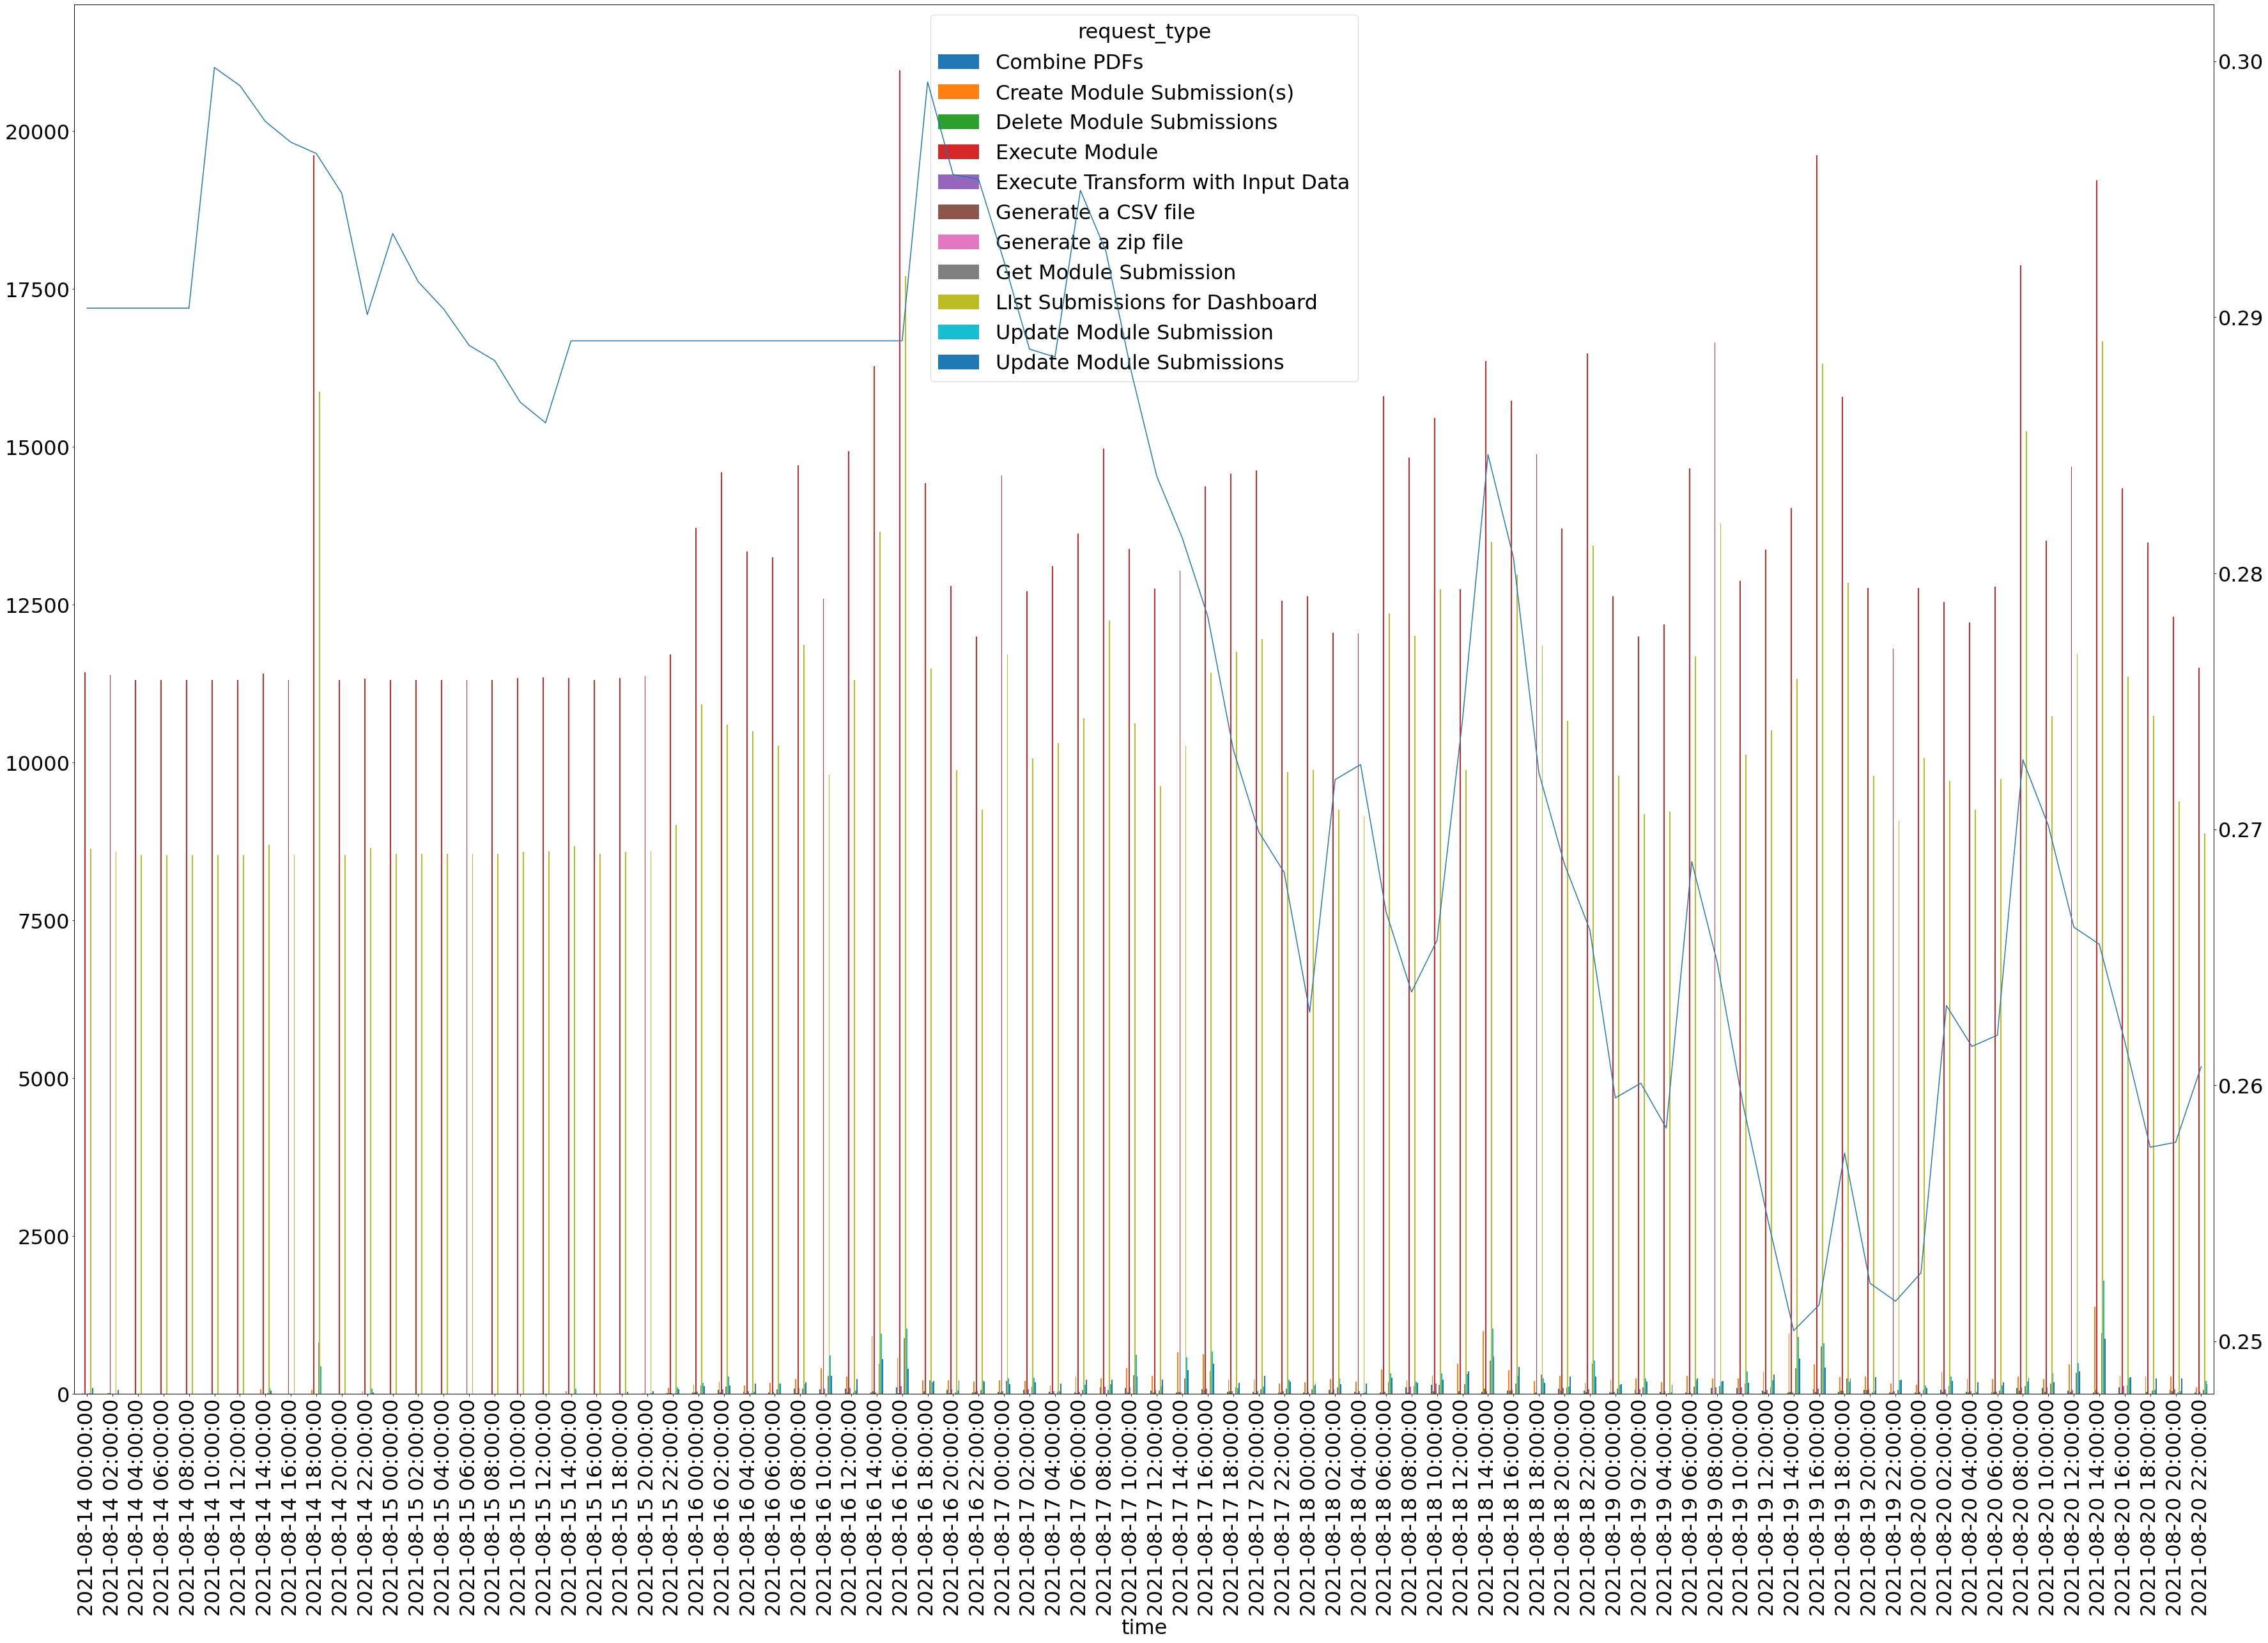

In [6]:
value_var = 'req_size'
results1 = results.groupby(['client','env','request_type',pd.Grouper(key='time',freq='2H')]).agg({'target_port':'size',
        'received_bytes':q50,'processing_time':q50}).rename(columns={'target_port':'req_size'}).reset_index()
def fill_dates(df):
    dates = pd.date_range(df.index.min(),df.index.max(),freq='2h')
    return df[value_var].reindex(dates)
results1_fill = results1.set_index('time').groupby(['client','env','request_type']).apply(fill_dates).reset_index().fillna(0).rename(columns=lambda x: 
        re.sub('level_.*','time',x))
remove_list = ['NULL','ping','Other','form','logout','module','moduleProxy','promotion','transform','workflow','authorization']
include_list = ['Create Module Submissions','Get Service Logs','Generate PDF from Template (PDF Bar)']
start_date = datetime(2021,8,1)
end_date = datetime(2021,8,24)
results1_fill = results1_fill.loc[np.logical_not(results1_fill.request_type.isin(remove_list))&(results1_fill.time>=start_date)&(results1_fill.time<=end_date)]
#results1_fill = results1_fill.loc[results1_fill.request_type.isin(include_list)]
results1a = results1_fill.groupby(['client','env','time']).size().reset_index().rename(columns={0:'total_size'})
test = memLeak2.merge(results1a,on=['client','env','time'],how='right').fillna(method='ffill').fillna(method='bfill')
#plt.plot()
results1_fill.pivot(index='time', columns='request_type', values=value_var).plot(kind='bar')
plt.rcParams["figure.figsize"] = (60,40)
plt.rcParams.update({'font.size': 32})
plt.xticks(rotation=90)
plt2 = plt.twinx()
plt2.plot(test.index,test.value)
plt.plot()

[]

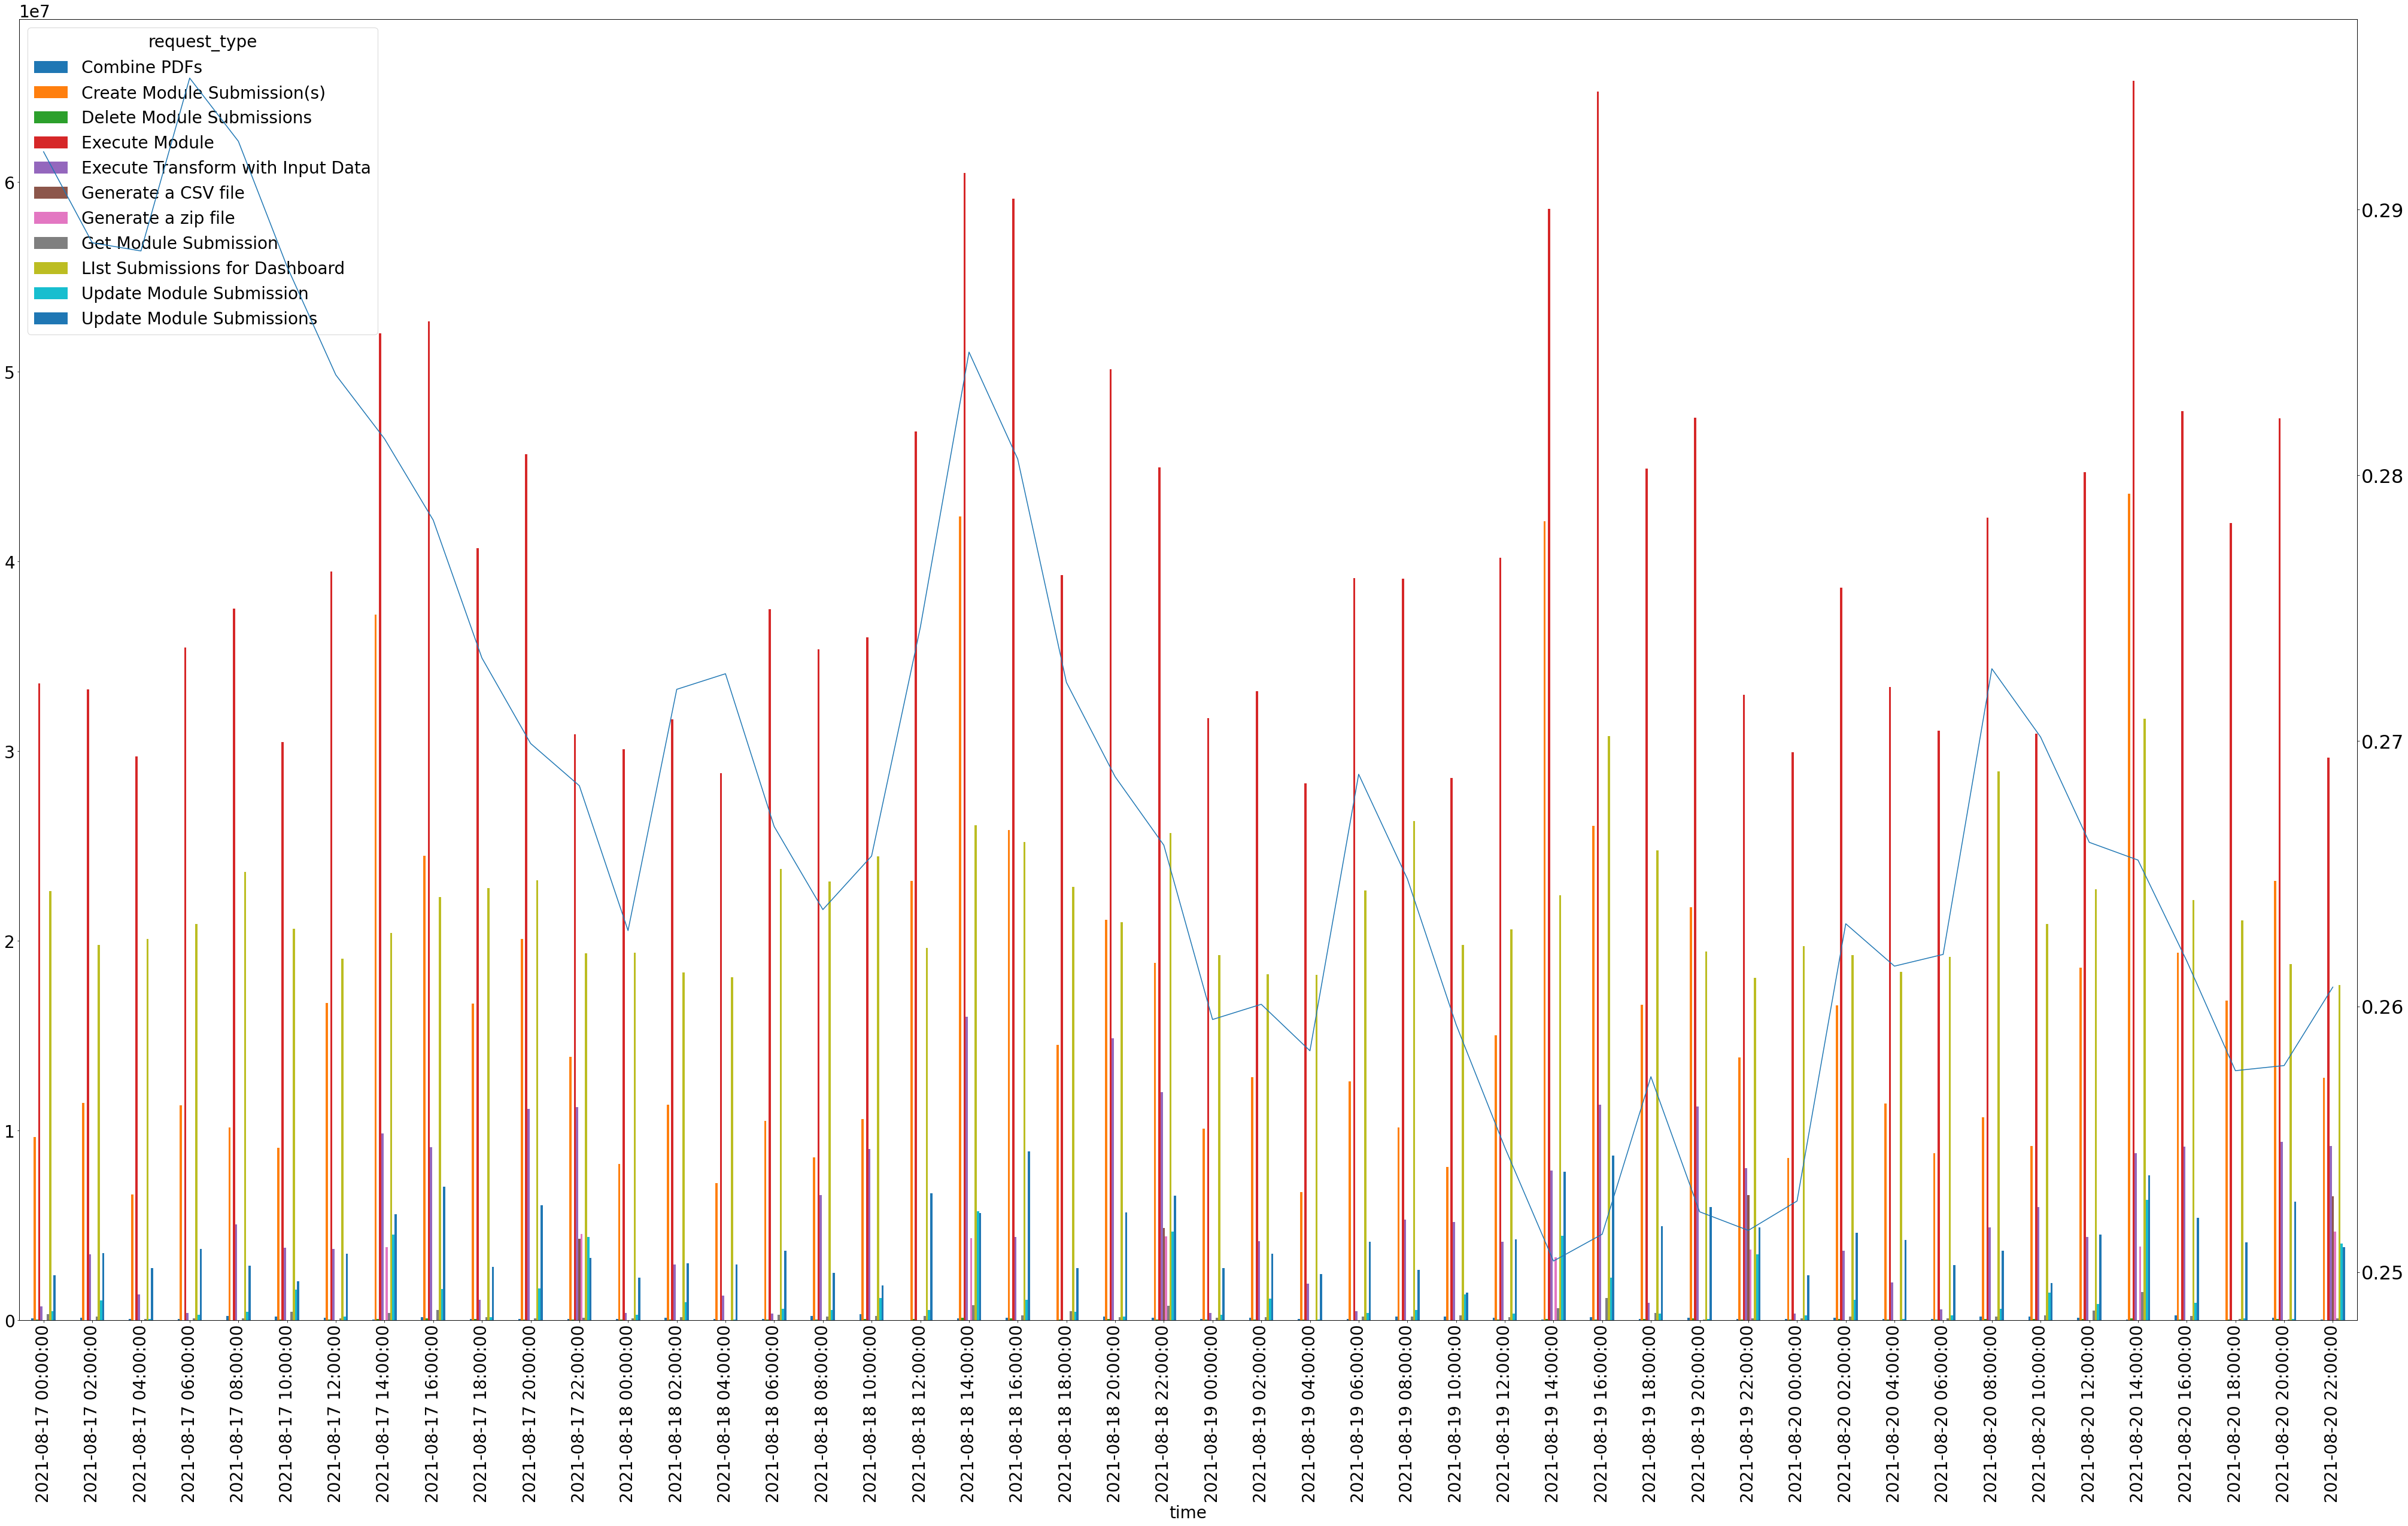

In [5]:
value_var = 'received_bytes'
results1 = results.groupby(['client','env','request_type',pd.Grouper(key='time',freq='2H')]).agg({'target_port':'size',
        'received_bytes':'sum','processing_time':'sum'}).rename(columns={'target_port':'req_size'}).reset_index()
def fill_dates(df):
    dates = pd.date_range(df.index.min(),df.index.max(),freq='2h')
    return df[value_var].reindex(dates)
results1_fill = results1.set_index('time').groupby(['client','env','request_type']).apply(fill_dates).reset_index().fillna(0).rename(columns=lambda x: 
        re.sub('level_.*','time',x))
remove_list = ['NULL','ping','Other','form','logout','module','moduleProxy','promotion','transform','workflow','authorization']
start_date = datetime(2021,8,17)
end_date = datetime(2021,8,21)
results1_fill = results1_fill.loc[np.logical_not(results1_fill.request_type.isin(remove_list))&(results1_fill.time>=start_date)&(results1_fill.time<=end_date)]
results1a = results1_fill.groupby(['client','env','time']).size().reset_index().rename(columns={0:'total_size'})
test = memLeak2.merge(results1a,on=['client','env','time'],how='right').fillna(method='ffill').fillna(method='bfill')
#plt.plot()
#results2_fill = results1_fill.groupby([''])
results1_fill.pivot(index='time', columns='request_type', values=value_var).plot(kind='bar')
plt.rcParams["figure.figsize"] = (60,40)
plt.rcParams.update({'font.size': 32})
plt.xticks(rotation=90)
plt2 = plt.twinx()
plt2.plot(test.index,test.value)
plt.plot()

[]

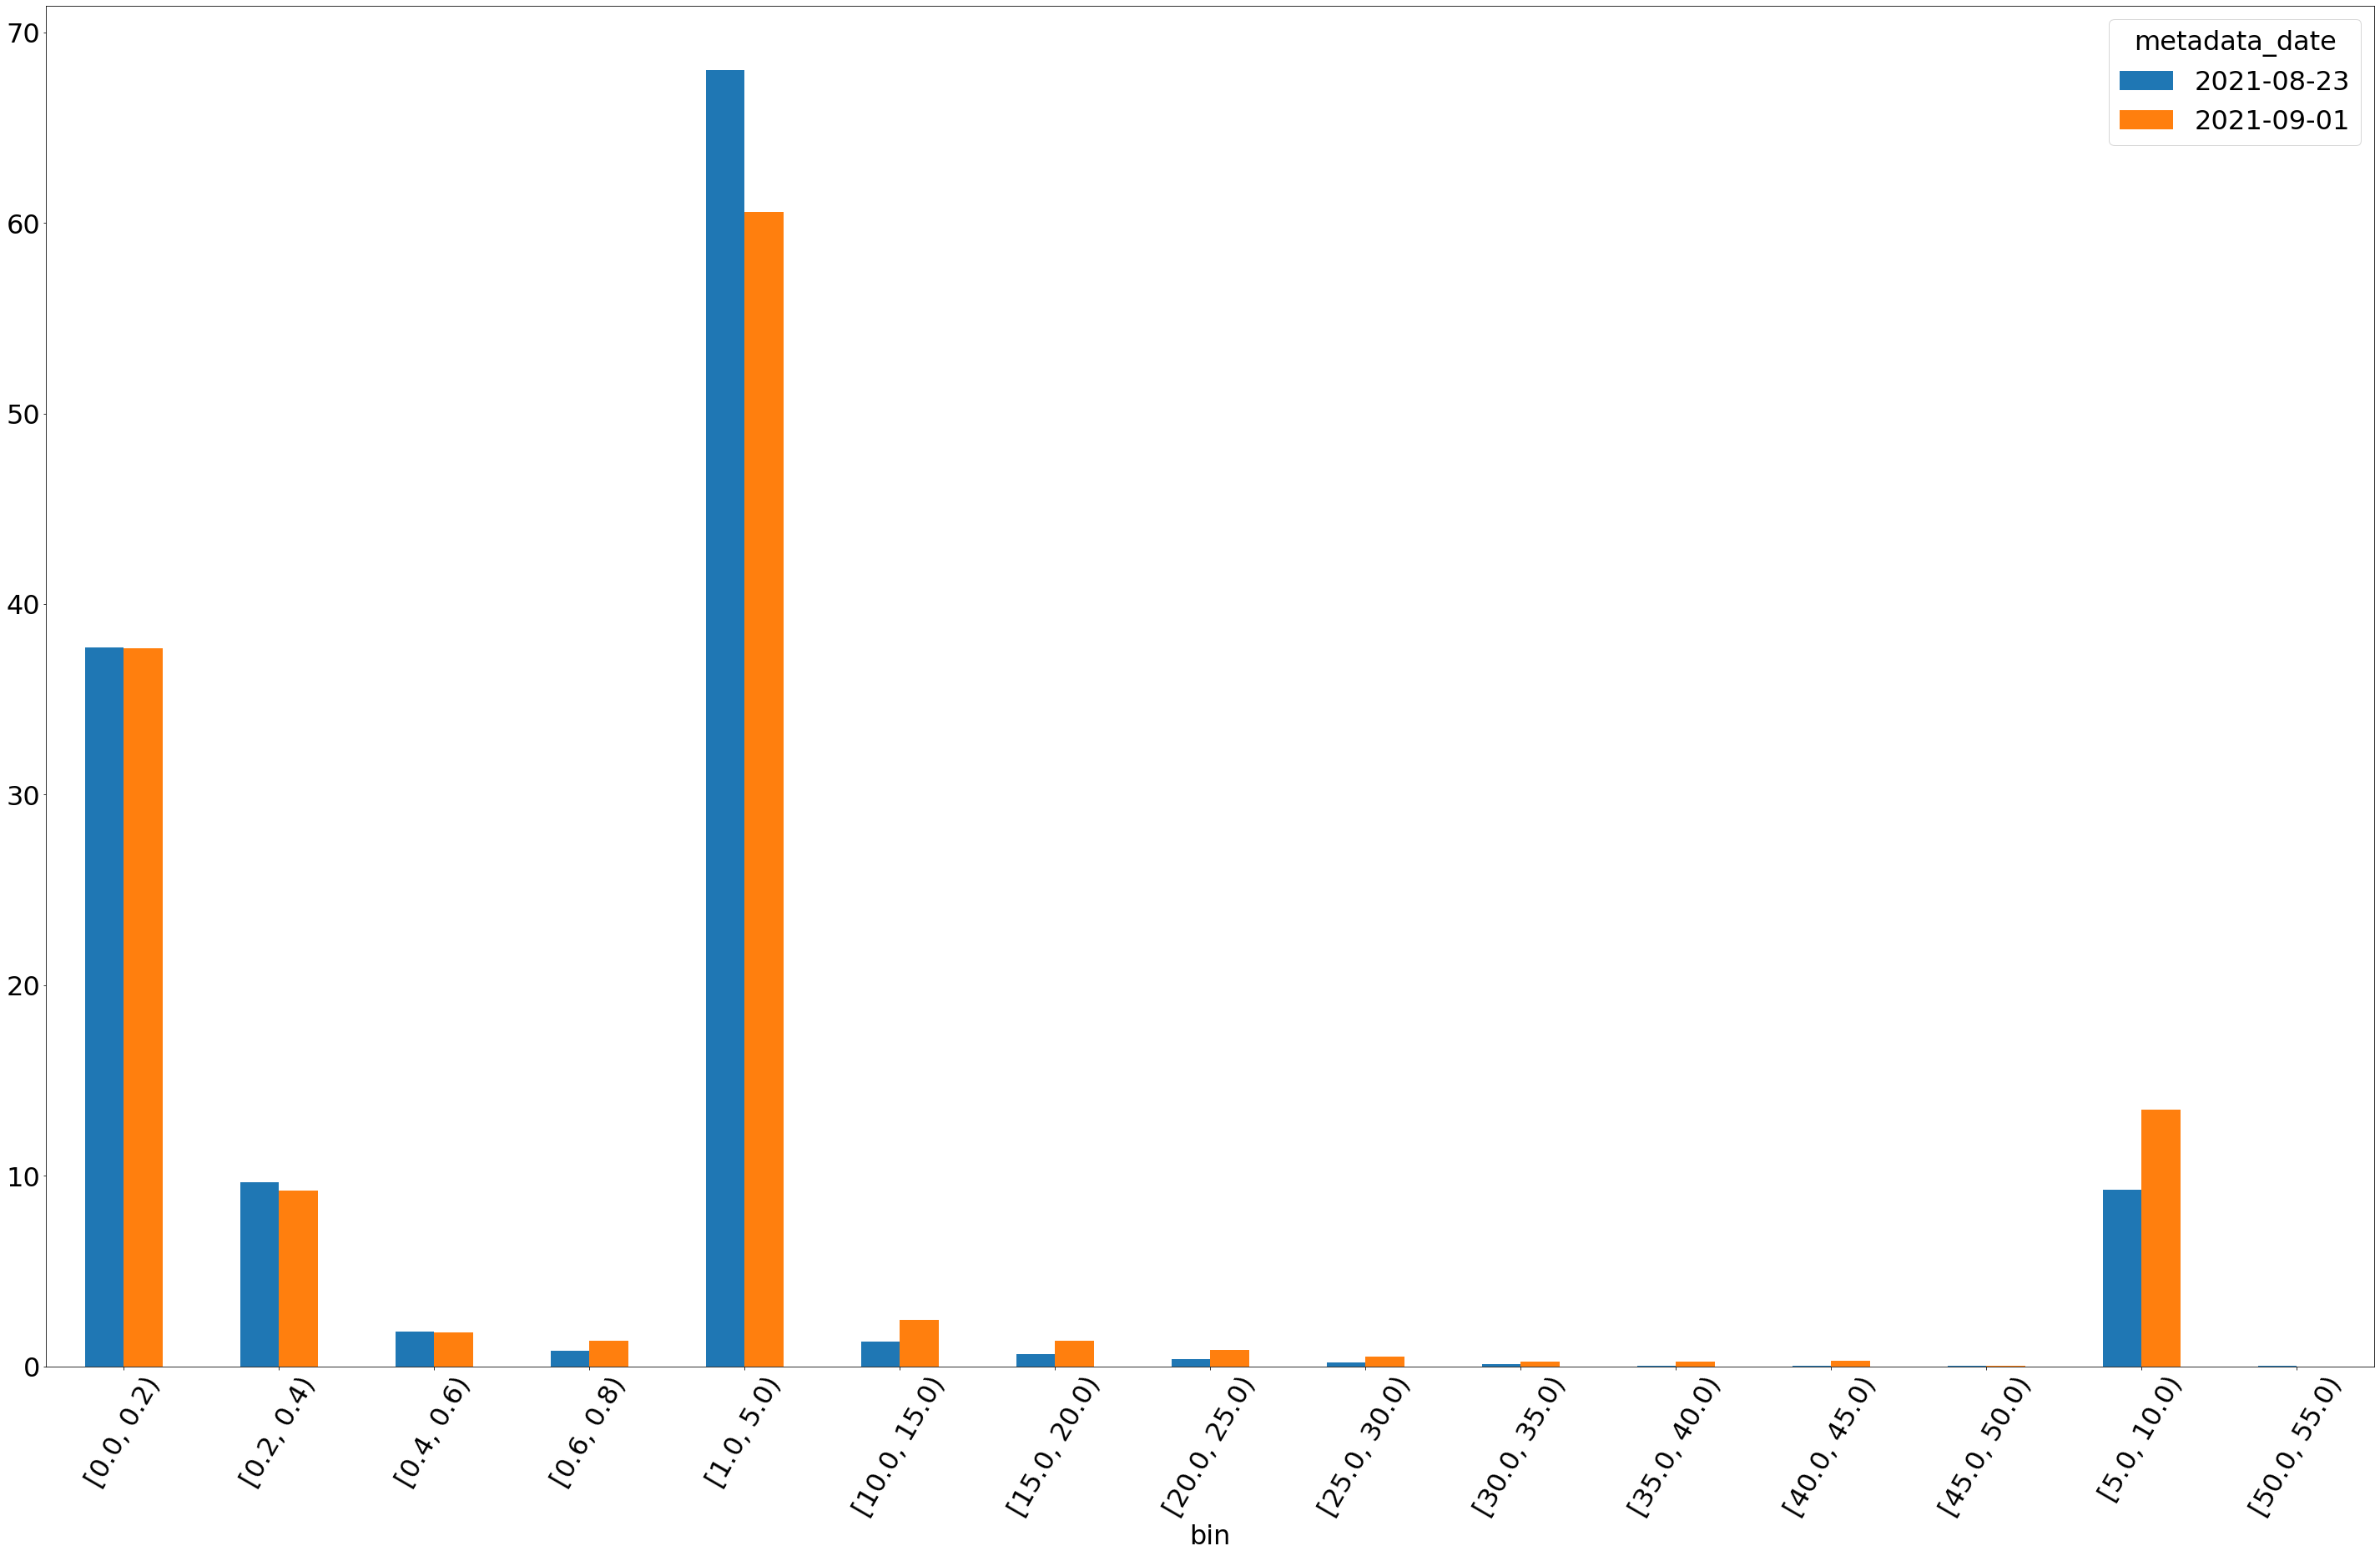

In [60]:
results4.pivot(index='bin', columns='metadata_date', values='req_normalize').plot(kind='bar')
plt.rcParams["figure.figsize"] = (40,25)
plt.rcParams.update({'font.size': 32})
plt.xticks(rotation=60)
plt.plot()

[]

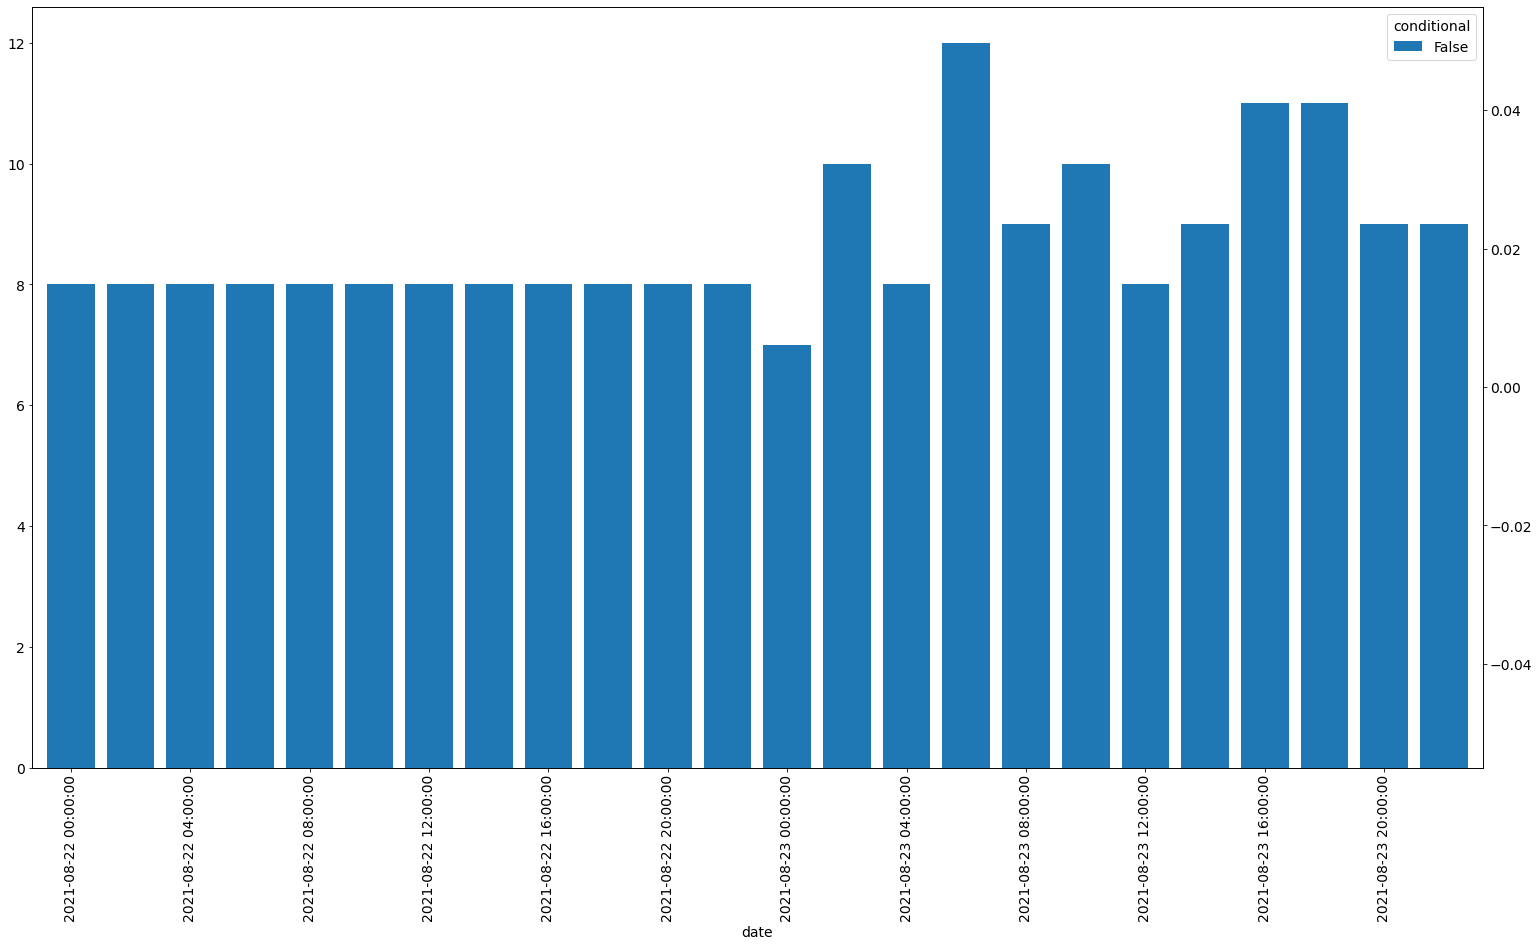

In [14]:
test = results.loc[results.request_uri == '/app/unifiedplatform'].groupby(['client','env','date','conditional']).size().reset_index().rename(columns={0:'req_size'})
try:
    test = test.set_index('date').groupby(['client','env','conditional']).apply(fill_dates).reset_index().rename(columns=lambda x: 
        re.sub('level_.*','date',x)).fillna(0)
except: test = test

test2 = test.pivot_table(index=['client','env','date'],columns=['conditional'],values=['req_size']).reset_index().fillna(0)
test2.columns=[x[0] if x[0]!='req_size' else x[1] for x in test2.columns]
test2.sort_values(['client','env','date'],ascending=(1,1,1),inplace=True)
memLeak2.rename(columns={'time':'date'},inplace=True)
memLeak2.sort_values(['client','env','date'],ascending=(1,1,1),inplace=True)
ml = memLeak2.merge(test2,on=['client','env','date'],how='right').fillna(method='ffill').fillna(method='bfill')
test.pivot(index='date', columns='conditional', values='req_size').plot(kind='bar',width=.8)
plt.rcParams["figure.figsize"] = (26,14)
plt.rcParams.update({'font.size': 14})
plt.xticks(rotation=90)
plt.locator_params(axis="x", nbins=20)
plt2 = plt.twinx()
plt2.plot(ml.index,ml.value,linewidth=2,color='green')
plt.plot()

# Test New Stuff

In [ ]:
my_vars = ['req_size','received_bytes','processing_time']
data2 = results2.groupby(['client','env','time']).size().reset_index().rename(columns={0:'total_size'})
"""
for j in my_vars:
    for k in results2.target_status_code.unique(): 
        results2a = results2.loc[results2.target_status_code==k].copy()
        results2a['request_type'] = results2a.apply(lambda x: x.request_type + '_' + k + '_' + j, axis=1)
        data2a = results2a.pivot_table(index=['client','env','time'],columns='request_type',values=j).reset_index()
        data2 = data2.merge(results3a, on=['client','env','time'],how='left').fillna(0)
"""
data2 = results1_fill.pivot(index='time', columns='request_type', values=value_var)
data2 = data2.merge(test,on=['time'])
data2 = data2.fillna(0)
#data2.info()
data2.columns = [re.sub(' ','_',x) for x in data2.columns]
data2.columns = [re.sub('[()]','',x) for x in data2.columns]
reg_vars = list(data2.columns)[1:16]
for var in [reg_vars + ['value']]:
    data2[var] = data2[var]-data2[var].shift(1)
data2 = data2.fillna(0)
reg = sm.ols('value~' + '+'.join(reg_vars),data=data2).fit()
reg.summary()

In [27]:
start_time = datetime(2021,8,22,6,0)
end_time = datetime(2021,8,25,20,0)
others = results.loc[(results.time>=start_time)&(results.time<=end_time)&(results.request_type=='Other')].copy()
others['cat1'] = others.request_uri.apply(lambda x: x[0:8])
others2 = others.groupby(['client','env','request_method','cat1']).agg({'target_status_code':'size','processing_time':'mean',
        'received_bytes':'mean','time':['max','min']}).reset_index()

others2.columns = [x[0] if x[0]!='time' else 'time_' + x[1] for x in others2.columns]
others2.sort_values(['target_status_code'],ascending=0).head(40)
#others

client         env request_method      cat1  target_status_code  \
10   ssgm  production            GET  /app/uni                 383   
12   ssgm  production            GET  /fbu/fil                 344   
14   ssgm  production            GET  /fbu/uap                 294   
8    ssgm  production            GET  /app/fxh                 283   
19   ssgm  production            PUT  /fbu/uap                 194   
15   ssgm  production           POST  /api/1.0                 111   
7    ssgm  production            GET  /?r=1629                  97   
16   ssgm  production           POST  /app/fxh                  41   
9    ssgm  production            GET  /app/occ                  33   
18   ssgm  production           POST  /logout?                  18   
11   ssgm  production            GET  /favicon                  13   
17   ssgm  production           POST  /app/occ                   4   
0    ssgm  production         DELETE  /fbu/uap                   4   
1    ssgm  production            GET  /?r=1594                   2   
13   ssgm  production            GET  /fbu/loc                   2   
5    ssgm  production            GET  /?r=1611                   1   
6    ssgm  production            GET  /?r=1626                   1   
4    ssgm  production            GET  /?r=1610                   1   
3    ssgm  production            GET  /?r=1601                   1   
2    ssgm  production            GET  /?r=1595                   1   

    processing_time  received_bytes                   time_max  \
10         0.005110      179.511749 2021-08-25 19:52:29.209832   
12         0.141116     1315.831395 2021-08-25 16:45:47.872588   
14         0.120857      240.377551 2021-08-25 18:04:56.398359   
8          0.006360      653.918728 2021-08-25 19:39:24.020927   
19         1.805093   362568.917526 2021-08-25 16:45:49.692346   
15         0.095288      417.072072 2021-08-25 19:56:16.985718   
7          0.005856      780.515464 2021-08-25 19:32:59.282550   
16         0.012268     1124.048780 2021-08-25 19:39:23.902089   
9          0.006121      671.060606 2021-08-25 10:20:45.488503   
18         0.013333     1119.222222 2021-08-25 19:14:08.061228   
11         0.006385      968.769231 2021-08-25 16:26:19.100040   
17         0.012000     1236.000000 2021-08-25 10:20:45.136207   
0          0.041250      961.000000 2021-08-24 17:51:38.091894   
1          0.006000      419.000000 2021-08-25 08:57:11.647233   
13         0.008500      565.000000 2021-08-24 17:51:04.465875   
5          0.008000      419.000000 2021-08-23 18:16:57.240359   
6          0.005000      419.000000 2021-08-25 13:18:45.786176   
4          0.007000      419.000000 2021-08-24 08:31:17.026815   
3          0.006000      419.000000 2021-08-23 02:52:29.607872   
2          0.005000      420.000000 2021-08-22 23:41:15.604813   

                     time_min  
10 2021-08-22 06:09:04.224699  
12 2021-08-22 15:06:14.977810  
14 2021-08-22 22:55:15.789445  
8  2021-08-22 22:55:12.696705  
19 2021-08-22 23:00:49.820210  
15 2021-08-22 06:55:19.052113  
7  2021-08-23 01:09:08.620313  
16 2021-08-23 03:00:51.683601  
9  2021-08-23 02:33:35.649143  
18 2021-08-23 06:56:41.884167  
11 2021-08-23 01:10:52.823508  
17 2021-08-23 20:29:16.620216  
0  2021-08-23 17:22:27.695792  
1  2021-08-23 06:56:45.030394  
13 2021-08-23 17:21:38.478660  
5  2021-08-23 18:16:57.240359  
6  2021-08-25 13:18:45.786176  
4  2021-08-24 08:31:17.026815  
3  2021-08-23 02:52:29.607872  
2  2021-08-22 23:41:15.604813

In [28]:
data = results.loc[(results.time>=start_time)&(results.time<=end_time)].copy()
data1 = data.groupby(['client','env','request_method','request_type','target_status_code']).size().reset_index().rename(columns={0:'req_size'})
data1.sort_values(['req_size'],ascending=0).head(30)

client         env request_method                       request_type  \
25   ssgm  production            PUT                     Execute Module   
4    ssgm  production            GET     List Submissions for Dashboard   
11   ssgm  production            GET                              query   
22   ssgm  production            PUT                       Execute Form   
29   ssgm  production            PUT           Update Module Submission   
13   ssgm  production           POST        Create Module Submission(s)   
30   ssgm  production            PUT          Update Module Submissions   
2    ssgm  production            GET              Get Module Submission   
21   ssgm  production           POST                            tracker   
10   ssgm  production            GET                                pdf   
32   ssgm  production            PUT                             module   
15   ssgm  production           POST  Execute Transform with Input Data   
12   ssgm  production           POST                       Combine PDFs   
6    ssgm  production            GET                              Other   
0    ssgm  production         DELETE          Delete Module Submissions   
9    ssgm  production            GET                               form   
28   ssgm  production            PUT                              Other   
18   ssgm  production           POST                              Other   
24   ssgm  production            PUT                     Execute Module   
19   ssgm  production           POST                              Other   
20   ssgm  production           POST                           services   
26   ssgm  production            PUT                     Execute Module   
17   ssgm  production           POST                Generate a zip file   
8    ssgm  production            GET                              Other   
23   ssgm  production            PUT                       Execute Form   
27   ssgm  production            PUT                     Execute Module   
1    ssgm  production         DELETE                              Other   
16   ssgm  production           POST                Generate a CSV file   
7    ssgm  production            GET                              Other   
31   ssgm  production            PUT          Update Module Submissions   

   target_status_code  req_size  
25                200    592274  
4                 200    470499  
11                200    220753  
22                200     38773  
29                200     13792  
13                201     12890  
30                200      9726  
2                 200      8182  
21                201      3552  
10                200      3462  
32                200      2047  
15                200      1953  
12                200      1710  
6                 200      1439  
0                 200       976  
9                 200       666  
28                204       194  
18                200       111  
24                  -        68  
19                302        63  
20                200        19  
26                412        16  
17                200        14  
8                 404        13  
23                412         7  
27                502         6  
1                 204         4  
16                200         4  
7                 401         4  
31                403         3

In [36]:
results3 = results.loc[results.target_status_code=='200'].copy()
data3 = results3.pivot_table(index=['client','env','date'], columns='request_type', values='processing_time', 
        aggfunc=np.size).reset_index().fillna(0)
data4 = results3.groupby()
data3

request_type client         env                date  Combine PDFs  \
0              ssgm  production 2021-08-30 00:00:00          27.0   
1              ssgm  production 2021-08-30 02:00:00          63.0   
2              ssgm  production 2021-08-30 04:00:00           0.0   
3              ssgm  production 2021-08-30 06:00:00          63.0   
4              ssgm  production 2021-08-30 08:00:00          63.0   
5              ssgm  production 2021-08-30 10:00:00         180.0   
6              ssgm  production 2021-08-30 12:00:00           0.0   
7              ssgm  production 2021-08-30 14:00:00          18.0   
8              ssgm  production 2021-08-30 16:00:00          87.0   
9              ssgm  production 2021-08-30 18:00:00          36.0   
10             ssgm  production 2021-08-30 20:00:00          36.0   
11             ssgm  production 2021-08-30 22:00:00          27.0   
12             ssgm  production 2021-08-31 00:00:00          27.0   
13             ssgm  production 2021-08-31 02:00:00          63.0   
14             ssgm  production 2021-08-31 04:00:00          36.0   
15             ssgm  production 2021-08-31 06:00:00          27.0   
16             ssgm  production 2021-08-31 08:00:00          54.0   
17             ssgm  production 2021-08-31 10:00:00         108.0   
18             ssgm  production 2021-08-31 12:00:00          54.0   
19             ssgm  production 2021-08-31 14:00:00          18.0   
20             ssgm  production 2021-08-31 16:00:00          72.0   
21             ssgm  production 2021-08-31 18:00:00           0.0   
22             ssgm  production 2021-08-31 20:00:00          42.0   
23             ssgm  production 2021-08-31 22:00:00          39.0   
24             ssgm  production 2021-09-01 00:00:00          30.0   
25             ssgm  production 2021-09-01 02:00:00          60.0   
26             ssgm  production 2021-09-01 04:00:00          36.0   
27             ssgm  production 2021-09-01 06:00:00          27.0   
28             ssgm  production 2021-09-01 08:00:00          81.0   
29             ssgm  production 2021-09-01 10:00:00         117.0   
30             ssgm  production 2021-09-01 12:00:00          45.0   
31             ssgm  production 2021-09-01 14:00:00          18.0   
32             ssgm  production 2021-09-01 16:00:00          72.0   
33             ssgm  production 2021-09-01 18:00:00           0.0   
34             ssgm  production 2021-09-01 20:00:00          36.0   
35             ssgm  production 2021-09-01 22:00:00          27.0   
36             ssgm  production 2021-09-02 00:00:00          54.0   
37             ssgm  production 2021-09-02 02:00:00          36.0   
38             ssgm  production 2021-09-02 04:00:00           0.0   
39             ssgm  production 2021-09-02 06:00:00          27.0   
40             ssgm  production 2021-09-02 08:00:00          49.0   
41             ssgm  production 2021-09-02 10:00:00         144.0   
42             ssgm  production 2021-09-02 12:00:00           0.0   
43             ssgm  production 2021-09-02 14:00:00          18.0   
44             ssgm  production 2021-09-02 16:00:00          81.0   
45             ssgm  production 2021-09-02 18:00:00           0.0   
46             ssgm  production 2021-09-02 20:00:00         105.0   
47             ssgm  production 2021-09-02 22:00:00          27.0   

request_type  Delete Module Submissions  Execute Form  Execute Module  \
0                                  29.0         902.0         12926.0   
1                                  36.0         904.0         12904.0   
2                                  22.0         900.0         12447.0   
3                                  12.0         902.0         15301.0   
4                                  12.0         902.0         18025.0   
5                                  30.0         905.0         14727.0   
6                                  15.0         901.0         13432.0   
7                                 

In [57]:
split_num = 1
results3 = results.loc[(results.request_type=='Execute Module')&(results.processing_time>split_num)].copy()
results3a = results.loc[(results.request_type=='Execute Module')&(results.processing_time<split_num)].copy()
bins = np.arange(0, results3.processing_time.max() + 5, 5)
bins2 = np.arange(0, split_num, .2)
results4 = results3.groupby(['client','env','metadata_date',pd.cut(results3.processing_time,bins,
    right=False)]).size().reset_index().rename(columns={'processing_time':'bin',0:'req_size'})
results4['total_size'] = results4.groupby(['client','env','metadata_date']).req_size.transform('sum')
results4['req_normalize'] = (results4.req_size/results4.total_size)*80
results4a = results3a.groupby(['client','env','metadata_date',pd.cut(results3a.processing_time,bins2,
    right=False)]).size().reset_index().rename(columns={'processing_time':'bin',0:'req_size'})
results4a['total_size'] = results4a.groupby(['client','env','metadata_date']).req_size.transform('sum')
results4a['req_normalize'] = (results4a.req_size/results4a.total_size)*50
results4 = results4.append(results4a, sort=True)
results4['bin'] = results4.bin.astype('str')
results4['bin'] = np.where(results4.bin=='[0.0, 5.0)', '[{}.0, 5.0)'.format(str(split_num)),results4.bin)
results4

bin client         env metadata_date  req_normalize  req_size  \
0     [1.0, 5.0)   ssgm  production    2021-08-23      68.004342      5482   
1    [5.0, 10.0)   ssgm  production    2021-08-23       9.266553       747   
2   [10.0, 15.0)   ssgm  production    2021-08-23       1.302528       105   
3   [15.0, 20.0)   ssgm  production    2021-08-23       0.645061        52   
4   [20.0, 25.0)   ssgm  production    2021-08-23       0.372151        30   
5   [25.0, 30.0)   ssgm  production    2021-08-23       0.198480        16   
6   [30.0, 35.0)   ssgm  production    2021-08-23       0.124050        10   
7   [35.0, 40.0)   ssgm  production    2021-08-23       0.012405         1   
8   [40.0, 45.0)   ssgm  production    2021-08-23       0.037215         3   
9   [45.0, 50.0)   ssgm  production    2021-08-23       0.024810         2   
10  [50.0, 55.0)   ssgm  production    2021-08-23       0.012405         1   
11    [1.0, 5.0)   ssgm  production    2021-09-01      60.597650      6768   
12   [5.0, 10.0)   ssgm  production    2021-09-01      13.466144      1504   
13  [10.0, 15.0)   ssgm  production    2021-09-01       2.453274       274   
14  [15.0, 20.0)   ssgm  production    2021-09-01       1.343033       150   
15  [20.0, 25.0)   ssgm  production    2021-09-01       0.877448        98   
16  [25.0, 30.0)   ssgm  production    2021-09-01       0.492445        55   
17  [30.0, 35.0)   ssgm  production    2021-09-01       0.241746        27   
18  [35.0, 40.0)   ssgm  production    2021-09-01       0.232792        26   
19  [40.0, 45.0)   ssgm  production    2021-09-01       0.277560        31   
20  [45.0, 50.0)   ssgm  production    2021-09-01       0.017907         2   
21  [50.0, 55.0)   ssgm  production    2021-09-01       0.000000         0   
0     [0.0, 0.2)   ssgm  production    2021-08-23      37.708235    126171   
1     [0.2, 0.4)   ssgm  production    2021-08-23       9.668916     32352   
2     [0.4, 0.6)   ssgm  production    2021-08-23       1.811726      6062   
3     [0.6, 0.8)   ssgm  production    2021-08-23       0.811123      2714   
4     [0.0, 0.2)   ssgm  production    2021-09-01      37.662179    129234   
5     [0.2, 0.4)   ssgm  production    2021-09-01       9.215481     31622   
6     [0.4, 0.6)   ssgm  production    2021-09-01       1.798683      6172   
7     [0.6, 0.8)   ssgm  production    2021-09-01       1.323658      4542   

    total_size  
0         6449  
1         6449  
2         6449  
3         6449  
4         6449  
5         6449  
6         6449  
7         6449  
8         6449  
9         6449  
10        6449  
11        8935  
12        8935  
13        8935  
14        8935  
15        8935  
16        8935  
17        8935  
18        8935  
19        8935  
20        8935  
21        8935  
0       167299  
1       167299  
2       167299  
3       167299  
4       171570  
5       171570  
6       171570  
7       171570

In [71]:
results = results.loc[(results.target_status_code=='200') | (results.target_status_code=='201')]
results2 = results.groupby(['client','env','request_type','metadata_date']).agg({'target_port':'size',
            'received_bytes':q50,'processing_time':q50}).rename(columns={'target_port':'req_size',
            'received_bytes':'received_bytes_q50','processing_time':'processing_time_q50'}).reset_index()

results2a = results.groupby(['client','env','request_type','metadata_date']).agg({'received_bytes':q75,
            'processing_time':q75}).rename(columns={'received_bytes':'received_bytes_q75','processing_time':'processing_time_q75'}).reset_index()

results2b = results.groupby(['client','env','request_type','metadata_date']).agg({'received_bytes':q90,
            'processing_time':q90}).rename(columns={'received_bytes':'received_bytes_q90','processing_time':'processing_time_q90'}).reset_index()

results2c = results.groupby(['client','env','request_type','metadata_date']).agg({'received_bytes':q95,
            'processing_time':q95}).rename(columns={'received_bytes':'received_bytes_q95','processing_time':'processing_time_q95'}).reset_index()

results2d = results.groupby(['client','env','request_type','metadata_date']).agg({'received_bytes':q99,
            'processing_time':q99}).rename(columns={'received_bytes':'received_bytes_q99','processing_time':'processing_time_q99'}).reset_index()

results2 = results2.merge(results2a,on=['client','env','request_type','metadata_date']).merge(results2b,on=['client','env','request_type',
                'metadata_date']).merge(results2c,on=['client','env','request_type','metadata_date']).merge(results2d,on=['client',
                'env','request_type','metadata_date'])

results2 = results2[['client','env','request_type','metadata_date','req_size']+sorted([x for x in results2.columns if 'received_bytes' in x]) +
                   sorted([x for x in results2.columns if 'processing_time' in x])]
results2[['client','env','request_type','metadata_date','req_size'] +
            sorted([x for x in results2.columns if 'processing_time' in x])]

client         env                       request_type metadata_date  \
0    ssgm  production                       Combine PDFs    2021-08-23   
1    ssgm  production                       Combine PDFs    2021-09-01   
2    ssgm  production        Create Module Submission(s)    2021-08-23   
3    ssgm  production        Create Module Submission(s)    2021-09-01   
4    ssgm  production          Delete Module Submissions    2021-08-23   
5    ssgm  production          Delete Module Submissions    2021-09-01   
6    ssgm  production                     Execute Module    2021-08-23   
7    ssgm  production                     Execute Module    2021-09-01   
8    ssgm  production  Execute Transform with Input Data    2021-08-23   
9    ssgm  production  Execute Transform with Input Data    2021-09-01   
10   ssgm  production                Generate a CSV file    2021-08-23   
11   ssgm  production                Generate a CSV file    2021-09-01   
12   ssgm  production                Generate a zip file    2021-08-23   
13   ssgm  production                Generate a zip file    2021-09-01   
14   ssgm  production              Get Module Submission    2021-08-23   
15   ssgm  production              Get Module Submission    2021-09-01   
16   ssgm  production     List Submissions for Dashboard    2021-08-23   
17   ssgm  production     List Submissions for Dashboard    2021-09-01   
18   ssgm  production                               NULL    2021-08-23   
19   ssgm  production                               NULL    2021-09-01   
20   ssgm  production                              Other    2021-08-23   
21   ssgm  production                              Other    2021-09-01   
22   ssgm  production           Update Module Submission    2021-08-23   
23   ssgm  production           Update Module Submission    2021-09-01   
24   ssgm  production          Update Module Submissions    2021-08-23   
25   ssgm  production          Update Module Submissions    2021-09-01   
26   ssgm  production                      authorization    2021-08-23   
27   ssgm  production                      authorization    2021-09-01   
28   ssgm  production                               form    2021-08-23   
29   ssgm  production                               form    2021-09-01   
30   ssgm  production                             module    2021-08-23   
31   ssgm  production                             module    2021-09-01   
32   ssgm  production                               ping    2021-08-23   

    req_size  processing_time_q50  processing_time_q75  processing_time_q90  \
0        612               0.2410              0.27600               1.0769   
1        549               0.2390              0.27900               1.1130   
2       3796               0.2890              1.12600               2.9140   
3       7637               0.1830              0.85300               2.8958   
4        314               0.2150              0.53150               1.3539   
5        579               0.2320              0.53850               1.2688   
6     175271               0.1470              0.21000               0.3830   
7     182515               0.1490              0.21600               0.5180   
8        692               1.2365              1.32800               1.8274   
9        627               1.2350              1.35050               2.3326   
10         2               0.0600              0.07650               0.0864   
11         1               0.4770              0.47700               0.4770   
12         4               0.0880              0.09575               0.1007   
13         4               0.1285              0.14125               0.1525   
14      2735               0.0190              0.02200               0.0330   
15      3877               0.0140              0.01800               0.0280   
16    140133               0.0580              0.07100               0.0960   
17    148246               0.0620              0.07700          

In [78]:
results = results.loc[results.request_type=='Execute Module'].copy()
results['module'] = results.request_uri.apply(lambda x: re.sub('/.*','',re.sub('/fbu/uapi/modules/','',x)))
results2 = results.groupby(['client','env','module','metadata_date']).agg({'target_port':'size',
            'received_bytes':q50,'processing_time':q50}).rename(columns={'target_port':'req_size',
            'received_bytes':'received_bytes_q50','processing_time':'processing_time_q50'}).reset_index()

results2a = results.groupby(['client','env','module','metadata_date']).agg({'received_bytes':q75,
            'processing_time':q75}).rename(columns={'received_bytes':'received_bytes_q75','processing_time':'processing_time_q75'}).reset_index()

results2b = results.groupby(['client','env','module','metadata_date']).agg({'received_bytes':q90,
            'processing_time':q90}).rename(columns={'received_bytes':'received_bytes_q90','processing_time':'processing_time_q90'}).reset_index()

results2c = results.groupby(['client','env','module','metadata_date']).agg({'received_bytes':q95,
            'processing_time':q95}).rename(columns={'received_bytes':'received_bytes_q95','processing_time':'processing_time_q95'}).reset_index()

results2d = results.groupby(['client','env','module','metadata_date']).agg({'received_bytes':q99,
            'processing_time':q99}).rename(columns={'received_bytes':'received_bytes_q99','processing_time':'processing_time_q99'}).reset_index()

results2 = results2.merge(results2a,on=['client','env','module','metadata_date']).merge(results2b,on=['client','env','module',
                'metadata_date']).merge(results2c,on=['client','env','module','metadata_date']).merge(results2d,on=['client',
                'env','module','metadata_date'])

results2 = results2[['client','env','module','metadata_date','req_size']+sorted([x for x in results2.columns if 'received_bytes' in x]) +
                   sorted([x for x in results2.columns if 'processing_time' in x])]
results2[['client','env','module','metadata_date','req_size'] +
            sorted([x for x in results2.columns if 'processing_time' in x])]

client         env                    module metadata_date  req_size  \
0     ssgm  production  5e6a7db0013d97020f4d2aff    2021-08-23       716   
1     ssgm  production  5e6a7db0013d97020f4d2aff    2021-09-01       681   
2     ssgm  production  5e6aa5da33488d02108b2665    2021-08-23       323   
3     ssgm  production  5e6aa5da33488d02108b2665    2021-09-01        47   
4     ssgm  production  5e6ecd836f8d7d020fb7db6b    2021-08-23       697   
..     ...         ...                       ...           ...       ...   
175   ssgm  production  60111c8bea97633fe1386e65    2021-09-01         2   
176   ssgm  production  6011c39eea97633fe1387c20    2021-08-23       712   
177   ssgm  production  6011c39eea97633fe1387c20    2021-09-01      2872   
178   ssgm  production  60131db4af3c514118ec83ae    2021-08-23       712   
179   ssgm  production  60131db4af3c514118ec83ae    2021-09-01      2872   

     processing_time_q50  processing_time_q75  processing_time_q90  \
0                 0.8885              1.10600               1.2525   
1                 0.8020              1.20200               1.4470   
2                 0.7630              0.80400               0.8814   
3                 0.7620              0.80550               0.8432   
4                 0.2200              0.24100               0.2704   
..                   ...                  ...                  ...   
175               0.2115              0.23025               0.2415   
176               0.0925              0.10000               0.1100   
177               0.0900              0.09600               0.1030   
178               0.0940              0.10200               0.1209   
179               0.0910              0.09800               0.1060   

     processing_time_q95  processing_time_q99  
0                1.35075              1.52470  
1                1.62000              2.08020  
2                0.95100              1.21062  
3                0.92450              1.42580  
4                0.29400              0.36508  
..                   ...                  ...  
175              0.24525              0.24825  
176              0.11900              0.20968  
177              0.10800              0.13200  
178              0.14745              0.29492  
179              0.11900              0.15429  

[180 rows x 10 columns]

In [14]:
test = results.groupby(['client','env','metadata_date','request_type','request_method','target_status_code']).size().reset_index().rename(columns={0:'req_size'})
test = test.loc[np.logical_not(test.target_status_code=='-')].copy()
test.pivot_table(index=['client','env','request_type','request_method'],columns=['metadata_date'],values=['req_size']).reset_index().fillna(0)

client         env                       request_type  \
metadata_date                                                         
0               ssgm  production                       Combine PDFs   
1               ssgm  production        Create Module Submission(s)   
2               ssgm  production          Delete Module Submissions   
3               ssgm  production                       Execute Form   
4               ssgm  production                     Execute Module   
5               ssgm  production  Execute Transform with Input Data   
6               ssgm  production                Generate a CSV file   
7               ssgm  production                Generate a zip file   
8               ssgm  production              Get Module Submission   
9               ssgm  production     List Submissions for Dashboard   
10              ssgm  production                              Other   
11              ssgm  production                              Other   
12              ssgm  production                              Other   
13              ssgm  production           Update Module Submission   
14              ssgm  production          Update Module Submissions   
15              ssgm  production                               form   
16              ssgm  production                             module   
17              ssgm  production                                pdf   
18              ssgm  production                              query   
19              ssgm  production                           services   
20              ssgm  production                            tracker   

              request_method   req_size                           \
metadata_date                2021-08-28 2021-08-29    2021-08-30   
0                       POST        0.0        9.0    600.000000   
1                       POST      151.0      175.0   3137.000000   
2                     DELETE        0.0        1.0    264.000000   
3                        PUT     5258.5     5401.0   5414.000000   
4                        PUT    67944.0   136343.0  55006.333333   
5                       POST        8.0       18.0    696.000000   
6                       POST        1.0        1.0      2.000000   
7                       POST        4.0        4.0      4.000000   
8                        GET       25.0       36.0   1339.000000   
9                        GET   102777.0   103479.0  64768.500000   
10                       GET      104.0      110.0    284.500000   
11                      POST       13.5       24.0     25.500000   
12                       PUT        0.0        1.0     68.000000   
13                       PUT      194.0      219.0   2587.000000   
14                       PUT      142.0      311.0   2622.000000   
15                       GET        0.0        5.0    289.000000   
16                       PUT       29.5       69.0    294.000000   
17                       GET        0.0       18.0   1207.000000   
18                       GET    25377.0    25777.0  59650.000000   
19                      POST        0.0        0.0     13.000000   
20                      POST        0.0        8.0    760.000000   

                                                      
metadata_date    2021-08-31 2021-09-01    2021-09-02  
0                540.000000      549.0    541.000000  
1              10382.000000     7637.0   4946.000000  
2                546.000000      579.0    486.000000  
3               3609.000000     5413.0   5414.000000  
4              61199.333333    60839.0  55750.333333  
5                658.000000      627.0    636.000000  
6                  1.000000        1.0      1.000000  
7                  4.000000        4.0      4.000000  
8               5946.000000     3877.0   2007.000000  
9              49638.333333    74123.5  44409.000000  
10               257.500000      255.0    244.500000  
11                29.500000       27.5     28.000000  
12                62.000000       63.0     61

In [3]:
#test = results.groupby(['client','env','metadata_date','conditional']).size().reset_index().rename(columns={0:'req_size'})
#test.pivot_table(index=['client','env','metadata_date'],columns=['conditional'],values=['req_size']).reset_index().fillna(0)
memLeak2

query            group  \
62328  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  ssgm-production   
62329  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  ssgm-production   
62330  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  ssgm-production   
62331  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  ssgm-production   
62332  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  ssgm-production   
...                                              ...              ...   
62491  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  ssgm-production   
62492  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  ssgm-production   
62493  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  ssgm-production   
62494  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  ssgm-production   
62495  cutoff_max(avg:system.mem.pct_usable{*}  0.3)  ssgm-production   

                     date     value client         env  \
62328 2021-09-04 02:00:00  0.149168   ssgm  production   
62329 2021-09-04 03:00:00  0.148775   ssgm  production   
62330 2021-09-04 04:00:00  0.145394   ssgm  production   
62331 2021-09-04 05:00:00  0.141849   ssgm  production   
62332 2021-09-04 06:00:00  0.140111   ssgm  production   
...                   ...       ...    ...         ...   
62491 2021-09-10 21:00:00  0.183278   ssgm  production   
62492 2021-09-10 22:00:00  0.182500   ssgm  production   
62493 2021-09-10 23:00:00  0.181457   ssgm  production   
62494 2021-09-11 00:00:00  0.179190   ssgm  production   
62495 2021-09-11 01:00:00  0.175714   ssgm  production   

                    time_backup  
62328 2021-09-03 22:00:00+00:00  
62329 2021-09-03 23:00:00+00:00  
62330 2021-09-04 00:00:00+00:00  
62331 2021-09-04 01:00:00+00:00  
62332 2021-09-04 02:00:00+00:00  
...                         ...  
62491 2021-09-10 17:00:00+00:00  
62492 2021-09-10 18:00:00+00:00  
62493 2021-09-10 19:00:00+00:00  
62494 2021-09-10 20:00:00+00:00  
62495 2021-09-10 21:00:00+00:00  

[168 rows x 7 columns]

In [1]:
pip install datadog-api-client

     |████████████████████████████████| 2.4 MB 4.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
